In [1]:
from causallearn.search.ConstraintBased.PC import pc
from causallearn.search.ConstraintBased.FCI import fci
import pandas as pd
import numpy as np
import simple_icd_10_cm as cm
import matplotlib.pyplot as plt

In [77]:
df = pd.read_csv('../assets/A419.csv')
df = df.iloc[:,2:]
df

,LandArea_sqm,d2m,t2m,bcaod550,chnk,duaod550,istl1,lai_hv,lai_lv,msl,...,aermr01,aermr02,aermr03,aermr12,aermr11,so2,ICD,population,normalized,pop_density
0,555807428,280.172895,285.929074,0.003808,0.018000,0.002899,271.459808,3.963993,1.848770,101895.045213,...,2.573321e-11,2.119857e-09,3.099718e-10,6.523328e-09,3.524161e-09,8.431804e-09,9,27049,0.000333,48.666136
1,98193838,281.818645,288.061483,0.004224,0.018000,0.003212,271.459808,4.576808,1.090162,101809.866718,...,2.182705e-11,1.787025e-09,2.637678e-10,4.957150e-09,3.020807e-09,7.146589e-09,4,5939,0.000674,60.482410
2,555410015,284.923760,289.888588,0.004736,0.017151,0.002803,271.459808,2.720536,1.549097,101782.173130,...,5.277778e-11,4.352085e-09,1.072008e-09,3.690529e-09,3.362279e-09,5.398583e-09,7,10143,0.000690,18.262184
3,302603143,280.079047,286.374439,0.003978,0.018000,0.003318,271.459808,4.953732,1.158310,101876.044561,...,2.192854e-11,1.800578e-09,2.473916e-10,5.077852e-09,2.994613e-09,6.635491e-09,3,15632,0.000192,51.658419
4,37019478,281.545960,287.436454,0.004191,0.018000,0.003191,271.459808,4.729550,1.203707,101832.289794,...,2.219778e-11,1.818836e-09,2.575622e-10,5.508350e-09,3.069187e-09,7.815213e-09,14,37764,0.000371,1020.111629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66977,135896425,284.858050,291.989320,0.002425,0.018000,0.003265,271.459625,4.954251,1.104480,101754.974193,...,3.321740e-11,2.694089e-09,5.771870e-10,2.499919e-09,1.894084e-09,3.310073e-09,3,1674,0.001792,12.318205
66978,516576903,283.498125,290.703285,0.002160,0.018000,0.002728,271.459625,4.166989,1.469765,101757.486555,...,2.465281e-11,2.006707e-09,3.936668e-10,3.472223e-09,1.884122e-09,4.445297e-09,11,15900,0.000692,30.779541
66979,463511411,288.323282,293.677518,0.002479,0.017478,0.003139,271.459625,4.299476,1.605994,101741.246372,...,6.587179e-11,5.368244e-09,2.124902e-09,2.507559e-09,2.099103e-09,3.456859e-09,5,3057,0.001636,6.595307
66980,48574015,284.488233,291.784665,0.002410,0.018000,0.003363,271.459625,4.617759,1.120454,101752.270689,...,2.987496e-11,2.420385e-09,4.769026e-10,1.991862e-09,1.739879e-09,2.665140e-09,36,59935,0.000601,1233.890178


In [80]:
units = "../assets/CAMS_units.csv"
units_df = pd.read_csv(units)
units_df = units_df[units_df['var_name'] != 'siconc']
units_df = units_df[units_df['var_name'] != 'sst']
units_df

,var_name,units,long_name,short_name,standard_name
0,longitude,degrees_east,longitude,NaN,NaN
1,latitude,degrees_north,latitude,NaN,NaN
2,time,NaN,time,NaN,NaN
3,d2m,K,2 metre dewpoint temperature,Dewpoint,NaN
4,t2m,K,2 metre temperature,T,NaN
...,...,...,...,...,...
73,aermr02,kg kg**-1,Sea Salt Aerosol (0.5 - 5 um) Mixing Ratio,SS (0.5 – 5 um),NaN
74,aermr03,kg kg**-1,Sea Salt Aerosol (5 - 20 um) Mixing Ratio,SS (5 – 20 um),NaN
75,aermr12,kg kg**-1,SO2 precursor mixing ratio,SO2 pre,NaN
76,aermr11,kg kg**-1,Sulphate Aerosol Mixing Ratio,SA,NaN


In [81]:
nice_labels = dict(zip(df.columns, ['ZIP Land Area'] + list(units_df['short_name'].values[3:]) + \
    ['ICD', 'ZIP Population', 'Normalized', 'Population Density']))
nice_labels

{'LandArea_sqm': 'ZIP Land Area',
 'd2m': 'Dewpoint',
 't2m': 'T',
 'bcaod550': 'BC AOD',
 'chnk': 'Charnock',
 'duaod550': 'Dust AOD',
 'istl1': 'Ice T',
 'lai_hv': 'LAI hv',
 'lai_lv': 'LAI lv',
 'msl': 'MSP',
 'omaod550': 'O AOD',
 'pm10': 'PM_{10}',
 'pm2p5': 'PM_{2.5}',
 'ssaod550': 'SS AOD',
 'asn': 'Snow albedo',
 'rsn': 'Snow density',
 'sd': 'Snow depth',
 'stl1': 'Soil T',
 'suaod550': 'SA AOD',
 'sp': 'P',
 'tsn': 'Snow T',
 'aod550': 'AOD',
 'tcco': 'TC CO',
 'tc_c2h6': 'TC C2H6',
 'tchcho': 'TC HCHO',
 'tc_oh': 'TC OH',
 'tc_c5h8': 'TC isoprene',
 'tc_ch4': 'TC CH4',
 'tc_hno3': 'TC HNO3',
 'tcno2': 'TC NO2',
 'tc_no': 'TC NO',
 'gtco3': 'TC O3',
 'tc_pan': 'TC PAN',
 'tc_c3h8': 'TC C3H8',
 'tcso2': 'TC SO2',
 'tcw': 'TC H2O',
 'tcwv': 'TC VI H2O',
 'aermssdus': 'VIM of DA (0.03 – 0.55 um)',
 'aermssdum': 'VIM of DA (0.55 – 9 um)',
 'aermssdul': 'VIM of DA (9 – 20 um)',
 'aermssbchphil': 'VIM of hydrophilic BC',
 'aermssomhphil': 'VIM of hydrophilic O',
 'aermssbchphob': '

In [22]:
df.columns = ['ZIP Land Area'] + [nice_labels[i] for i in units_df['var_name'] if i in df.columns] + ['ICD','Zip Population','Normalized','Population density']
df

,ZIP Land Area,Dewpoint,T,BC AOD,Charnock,Dust AOD,Ice T,LAI hv,LAI lv,MSP,...,SS (0.03 – 0.5 um),SS (0.5 – 5 um),SS (5 – 20 um),SO2 pre,SA,SO2,ICD,Zip Population,Normalized,Population density
0,555807428,280.172895,285.929074,0.003808,0.018000,0.002899,271.459808,3.963993,1.848770,101895.045213,...,2.573321e-11,2.119857e-09,3.099718e-10,6.523328e-09,3.524161e-09,8.431804e-09,9,27049,0.000333,48.666136
1,98193838,281.818645,288.061483,0.004224,0.018000,0.003212,271.459808,4.576808,1.090162,101809.866718,...,2.182705e-11,1.787025e-09,2.637678e-10,4.957150e-09,3.020807e-09,7.146589e-09,4,5939,0.000674,60.482410
2,555410015,284.923760,289.888588,0.004736,0.017151,0.002803,271.459808,2.720536,1.549097,101782.173130,...,5.277778e-11,4.352085e-09,1.072008e-09,3.690529e-09,3.362279e-09,5.398583e-09,7,10143,0.000690,18.262184
3,302603143,280.079047,286.374439,0.003978,0.018000,0.003318,271.459808,4.953732,1.158310,101876.044561,...,2.192854e-11,1.800578e-09,2.473916e-10,5.077852e-09,2.994613e-09,6.635491e-09,3,15632,0.000192,51.658419
4,37019478,281.545960,287.436454,0.004191,0.018000,0.003191,271.459808,4.729550,1.203707,101832.289794,...,2.219778e-11,1.818836e-09,2.575622e-10,5.508350e-09,3.069187e-09,7.815213e-09,14,37764,0.000371,1020.111629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66977,135896425,284.858050,291.989320,0.002425,0.018000,0.003265,271.459625,4.954251,1.104480,101754.974193,...,3.321740e-11,2.694089e-09,5.771870e-10,2.499919e-09,1.894084e-09,3.310073e-09,3,1674,0.001792,12.318205
66978,516576903,283.498125,290.703285,0.002160,0.018000,0.002728,271.459625,4.166989,1.469765,101757.486555,...,2.465281e-11,2.006707e-09,3.936668e-10,3.472223e-09,1.884122e-09,4.445297e-09,11,15900,0.000692,30.779541
66979,463511411,288.323282,293.677518,0.002479,0.017478,0.003139,271.459625,4.299476,1.605994,101741.246372,...,6.587179e-11,5.368244e-09,2.124902e-09,2.507559e-09,2.099103e-09,3.456859e-09,5,3057,0.001636,6.595307
66980,48574015,284.488233,291.784665,0.002410,0.018000,0.003363,271.459625,4.617759,1.120454,101752.270689,...,2.987496e-11,2.420385e-09,4.769026e-10,1.991862e-09,1.739879e-09,2.665140e-09,36,59935,0.000601,1233.890178


In [35]:
df = df.drop(df.filter(like='TC', axis=1),axis=1)
df = df.drop(df.filter(like='VIM', axis=1),axis=1)
df

,ZIP Land Area,Dewpoint,T,BC AOD,Charnock,Dust AOD,Ice T,LAI hv,LAI lv,MSP,...,SS (0.03 – 0.5 um),SS (0.5 – 5 um),SS (5 – 20 um),SO2 pre,SA,SO2,ICD,Zip Population,Normalized,Population density
0,555807428,280.172895,285.929074,0.003808,0.018000,0.002899,271.459808,3.963993,1.848770,101895.045213,...,2.573321e-11,2.119857e-09,3.099718e-10,6.523328e-09,3.524161e-09,8.431804e-09,9,27049,0.000333,48.666136
1,98193838,281.818645,288.061483,0.004224,0.018000,0.003212,271.459808,4.576808,1.090162,101809.866718,...,2.182705e-11,1.787025e-09,2.637678e-10,4.957150e-09,3.020807e-09,7.146589e-09,4,5939,0.000674,60.482410
2,555410015,284.923760,289.888588,0.004736,0.017151,0.002803,271.459808,2.720536,1.549097,101782.173130,...,5.277778e-11,4.352085e-09,1.072008e-09,3.690529e-09,3.362279e-09,5.398583e-09,7,10143,0.000690,18.262184
3,302603143,280.079047,286.374439,0.003978,0.018000,0.003318,271.459808,4.953732,1.158310,101876.044561,...,2.192854e-11,1.800578e-09,2.473916e-10,5.077852e-09,2.994613e-09,6.635491e-09,3,15632,0.000192,51.658419
4,37019478,281.545960,287.436454,0.004191,0.018000,0.003191,271.459808,4.729550,1.203707,101832.289794,...,2.219778e-11,1.818836e-09,2.575622e-10,5.508350e-09,3.069187e-09,7.815213e-09,14,37764,0.000371,1020.111629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66977,135896425,284.858050,291.989320,0.002425,0.018000,0.003265,271.459625,4.954251,1.104480,101754.974193,...,3.321740e-11,2.694089e-09,5.771870e-10,2.499919e-09,1.894084e-09,3.310073e-09,3,1674,0.001792,12.318205
66978,516576903,283.498125,290.703285,0.002160,0.018000,0.002728,271.459625,4.166989,1.469765,101757.486555,...,2.465281e-11,2.006707e-09,3.936668e-10,3.472223e-09,1.884122e-09,4.445297e-09,11,15900,0.000692,30.779541
66979,463511411,288.323282,293.677518,0.002479,0.017478,0.003139,271.459625,4.299476,1.605994,101741.246372,...,6.587179e-11,5.368244e-09,2.124902e-09,2.507559e-09,2.099103e-09,3.456859e-09,5,3057,0.001636,6.595307
66980,48574015,284.488233,291.784665,0.002410,0.018000,0.003363,271.459625,4.617759,1.120454,101752.270689,...,2.987496e-11,2.420385e-09,4.769026e-10,1.991862e-09,1.739879e-09,2.665140e-09,36,59935,0.000601,1233.890178


In [36]:
cg = pc(df.values)

  0%|          | 0/53 [00:00<?, ?it/s]

In [69]:
nx_cg = cg.to_nx_graph()

In [72]:
G, edges = fci(df.values)

  0%|          | 0/53 [00:00<?, ?it/s]

X53 --> X1
X2 --> X3
X18 --> X2
X10 --> X3
X3 --> X18
X4 --> X10
X4 --> X11
X5 --> X46
X9 --> X8
X36 --> X9
X42 --> X9
X26 --> X12
X30 --> X12
X48 --> X12
X16 --> X14
X14 --> X17
X44 --> X14
X19 --> X48
X42 --> X30
X34 --> X39
X53 --> X39
X45 --> X44
X49 --> X47
X51 --> X53


In [75]:
edges

Green: undirected; Blue: directed; Red: bi-directed



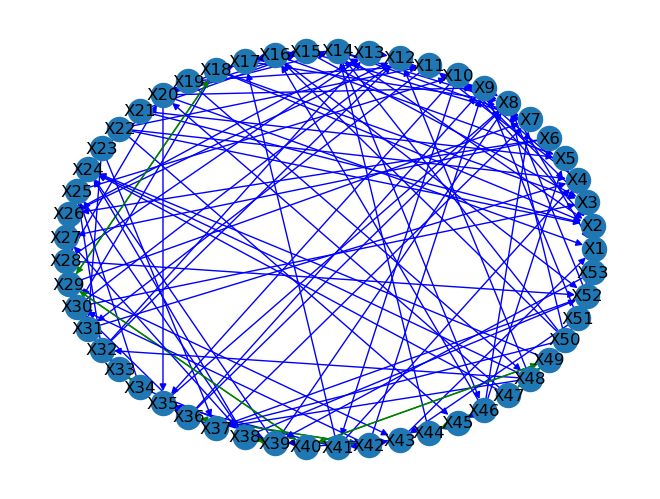

In [71]:
cg.to_nx_graph()
cg.draw_nx_graph(skel=False)

In [39]:
icd_code = 'A419'

In [49]:
import networkx as nx

In [40]:
from causallearn.utils.GraphUtils import GraphUtils

pyd = GraphUtils.to_pydot(cg.G, labels=df.columns, 
title = cm.get_description(icd_code), dpi=300)
pyd.write_png(f'../causalPlots/{icd_code}_short_labels.png')

In [39]:
# non=descriptive labels
pyd = GraphUtils.to_pydot(cg.G, labels=df.columns,
title = cm.get_description(icd_code), dpi=300)
pyd.write_png(f'../causalPlots/{icd_code}.png')